## Explore ECCO Datasets

#### Temp, salinity, and heat flux (monthly mean 0.5 degree)

***

Initalize Python libraries:

In [19]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import cmocean
import matplotlib.pyplot as plt

#### Datasets used:

ECCO Ocean and Sea-Ice Surface Heat Fluxes - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4

ECCO Ocean Temperature and Salinity - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4

ECCO Geometry Parameters for the 0.5 degree Lat-Lon Model Grid (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_GEOMETRY_05DEG_V4R4?ids=&values=&search=ecco%20grid%20lat&provider=POCLOUD

*Time Span: 1992-Jan-01 to 2018-Jan-01*

### Import ecco data

Open and combine all NetCDF files together using the `xarray.open_mfdataset` function:

In [3]:
# list of shortnames for three datasets: ECCO geometry (1 file), heat fluxes, and temperature/salinity

ecco_geometry = "ECCO_L4_GEOMETRY_05DEG_V4R4"
ecco_heat = "ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4"
ecco_temp_salt = "ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4"

In [4]:
# define root directory for location of all downloaded NetCDF files
root_dir = Path('../data/ECCO_V4r4_PODAAC')

# define the directory where the files specific to desired dataset are stored
nc_heat_dir = root_dir / ecco_heat
nc_temp_salt_dir = root_dir / ecco_temp_salt

In [131]:
heat_nc_files = list(nc_heat_dir.glob('*nc'))
temp_salt_nc_files = list(nc_temp_salt_dir.glob('*nc'))

print(f'number of files: {len(heat_nc_files)}')

number of files: 312


In [135]:
geometry_ds = xr.open_dataset('../data/ECCO_V4r4_PODAAC/ECCO_L4_GEOMETRY_05DEG_V4R4/GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc')

In [151]:
# Melville bay grid cell down to 100 meters deep
grid_cell = geometry_ds.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-100))
volume = grid_cell.drF.sum() * grid_cell.area
volume # in m^3

<xarray.DataArray ()>
array(7.88174643e+10)
Coordinates:
    latitude   float32 75.25
    longitude  float32 -60.75

## Plot temperature, salinity, and net heat flux

In [ ]:
temp_salt_ds = xr.open_mfdataset(temp_salt_nc_files, parallel=True, data_vars='minimal',\
                                coords='minimal', compat='override')

temp_salt_ds

<xarray.Dataset>
Dimensions:         (time: 312, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    Z_bnds          (Z, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    THETA           (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
    SALT            (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            7e05edde-4159-11eb-9ce1-0cc47a3f47f1

In [79]:
heat_ds = xr.open_mfdataset(heat_nc_files, parallel=True, data_vars='minimal',\
                            coords='minimal', compat='override')

heat_ds

<xarray.Dataset>
Dimensions:         (time: 312, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    EXFhl           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFhs           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFqnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIatmQnt        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    TFLUX           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQsw          (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIaaflux        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Ocean and Sea-Ice Surface Heat Fluxes ...
    uuid:                         73ea7d5c-4158-11eb-8d61-0cc47a3f812d

variable `EXFqnet`: Open ocean net air-sea heat flux. Net air-sea heat flux (turbulent and radiative) per unit area of open water (not covered by sea-ice). Note: net upward heat flux over open water, calculated as EXFlwnet+EXFswnet-EXFlh-EXFhs.

variable `oceQnet`: Net heat flux into the ocean surface. Net heat flux into the ocean surface from all processes: air-sea turbulent and radiative fluxes and turbulent and conductive fluxes between the ocean and sea-ice and snow. Note: oceQnet does not include the change in ocean heat content due to changing ocean ocean mass (oceFWflx). Mass fluxes from evaporation, precipitation, and runoff (EXFempmr) happen at the same temperature as the ocean surface temperature. Consequently, EmPmR does not change ocean surface temperature. Conversely, mass fluxes due to sea-ice thickening/thinning and snow melt in the model are assumed to happen at a fixed 0C. Consequently, mass fluxes due to phase changes between seawater and sea-ice and snow induce a heat flux when the ocean surface temperaure is not 0C. The variable TFLUX does include the change in ocean heat content due to changing ocean mass.

varaible `SIatmQnt`: Net upward heat flux to the atmosphere. Net upward heat flux to the atmosphere across open water and sea-ice or snow surfaces. Note: nonzero SIatmQnt may not be associated with a change in ocean potential temperature due to sea-ice growth or melting. To calculate total ocean heat content changes use the variable TFLUX which also accounts for changing ocean mass (e.g. oceFWflx).

variable `TFLUX`: Rate of change of ocean heat content per m2 accounting for mass fluxes. The rate of change of ocean heat content due to heat fluxes across the liquid surface and the addition or removal of mass. . Note: the global area integral of TFLUX and geothermal flux (geothermalFlux.bin) matches the time-derivative of ocean heat content (J/s). Unlike oceQnet, TFLUX includes the contribution to the ocean heat content from changing ocean mass (e.g. from oceFWflx).

#### locations selected to compare:

![baffinbay](BaffinBay_selections.JPG)

### plot temp, salinity, and heat flux profile of single location in Melville Bay

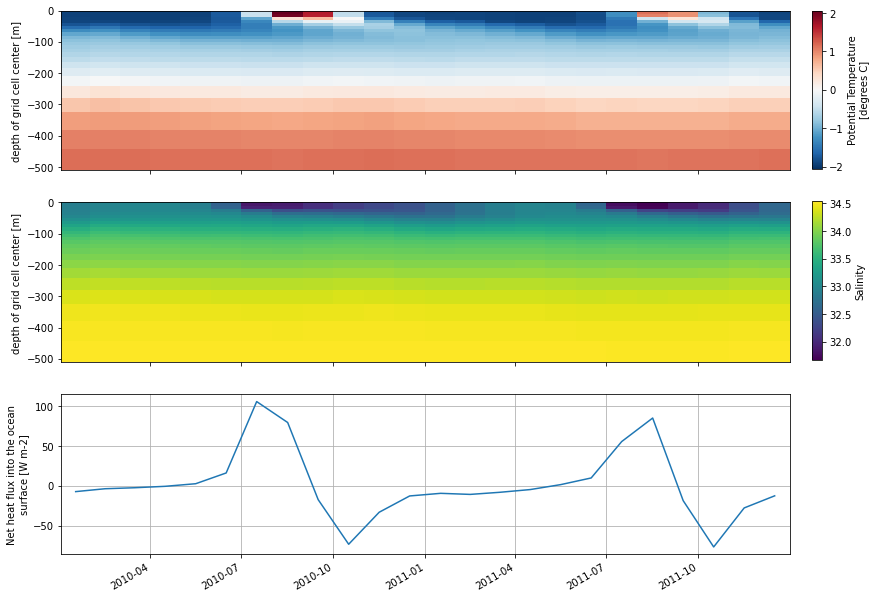

In [130]:
fig, axs = plt.subplots(3,1, figsize=[15,10],sharex=True)
axs = axs.ravel()

c1 = temp_salt_ds.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).THETA.plot(x="time",y="Z",ax=axs[0],add_colorbar=False)
axs[0].set_title("")
axs[0].set_xlabel("")

c2 = temp_salt_ds.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).SALT.plot(x="time",y="Z",ax=axs[1],add_colorbar=False)
axs[1].set_title("")
axs[1].set_xlabel("");

fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.82, 0.66, 0.01, 0.22])
cbar_ax2 = fig.add_axes([0.82, 0.395, 0.01, 0.22])
cbar1 = fig.colorbar(c1, cax=cbar_ax1)
cbar2 = fig.colorbar(c2, cax=cbar_ax2)

cbar1.set_label('Potential Temperature\n[degrees C]')
cbar2.set_label('Salinity')

heat_ds.sel(latitude=75.25, longitude=-60.75, time=slice("2010-01-01","2012-01-01")).oceQnet.plot(x="time",ax=axs[2])
# heat_ds.sel(latitude=75.25, longitude=-60.75, time=slice("2010-01-01","2012-01-01")).SIatmQnt.plot(x="time",ax=axs[2])
# heat_ds.sel(latitude=75.25, longitude=-60.75, time=slice("2010-01-01","2012-01-01")).TFLUX.plot(x="time",ax=axs[2])
axs[2].grid()
axs[2].set_title("")
axs[2].set_xlabel("");

### plot temp and salinity profile in Disko Bay

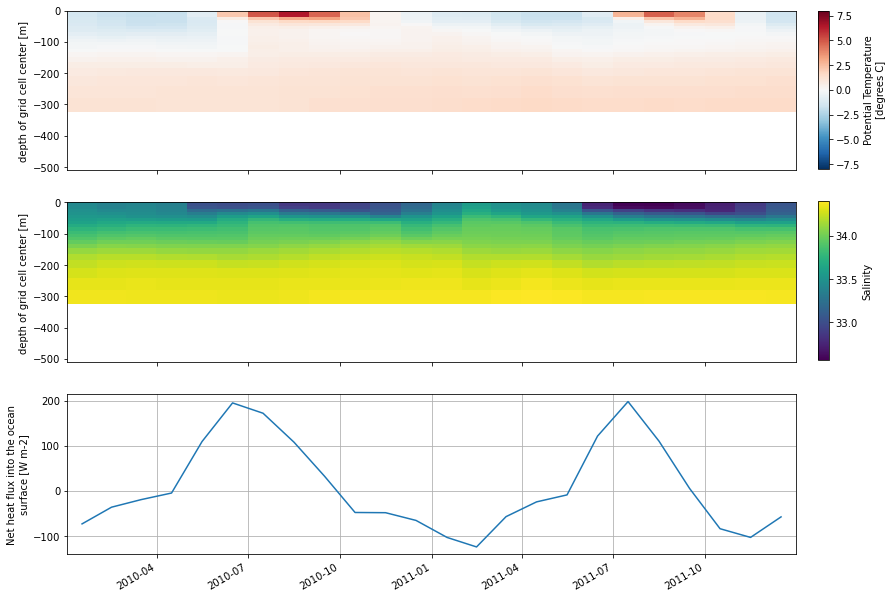

In [123]:
fig, axs = plt.subplots(3,1, figsize=[15,10],sharex=True)
axs = axs.ravel()

c1 = temp_salt_ds.sel(latitude=68.75, longitude=-55.25, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).THETA.plot(x="time",y="Z",ax=axs[0],
                                                                                                                     cmap="RdBu_r", vmin=-8,vmax=8,add_colorbar=False)
axs[0].set_title("")
axs[0].set_xlabel("")

c2 = temp_salt_ds.sel(latitude=68.75, longitude=-55.25, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).SALT.plot(x="time",y="Z",ax=axs[1],add_colorbar=False)
axs[1].set_title("")
axs[1].set_xlabel("");

fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.82, 0.66, 0.01, 0.22])
cbar_ax2 = fig.add_axes([0.82, 0.395, 0.01, 0.22])
cbar1 = fig.colorbar(c1, cax=cbar_ax1)
cbar2 = fig.colorbar(c2, cax=cbar_ax2)

cbar1.set_label('Potential Temperature\n[degrees C]')
cbar2.set_label('Salinity')

heat_ds.sel(latitude=68.75, longitude=-55.25, time=slice("2010-01-01","2012-01-01")).oceQnet.plot(x="time",ax=axs[2])
axs[2].grid()
axs[2].set_title("")
axs[2].set_xlabel("");

### plot temp and salinity profile in the SW Greenland/Labrador Sea (WGC)

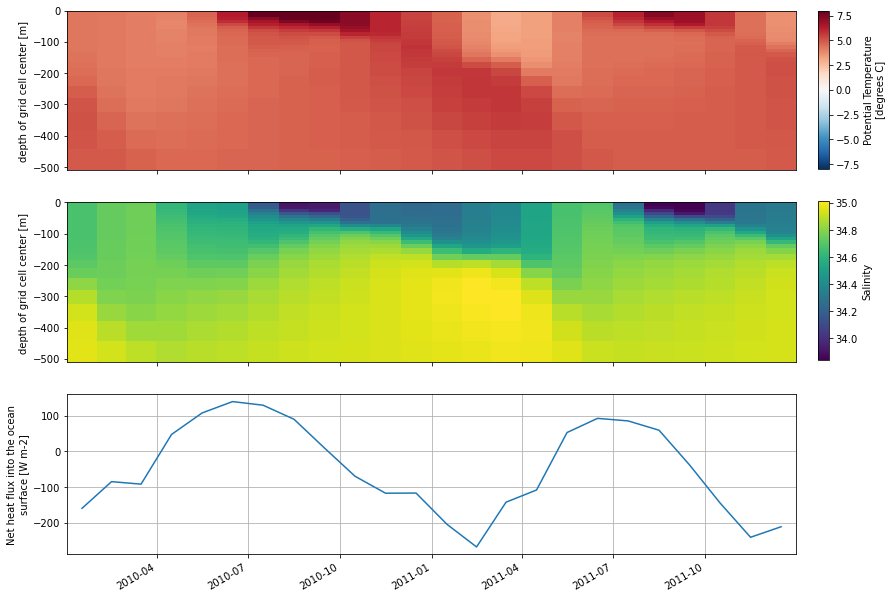

In [124]:
fig, axs = plt.subplots(3,1, figsize=[15,10],sharex=True)
axs = axs.ravel()

c1 = temp_salt_ds.sel(latitude=61.75, longitude=-50.75, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).THETA.plot(x="time",y="Z",ax=axs[0], 
                                                                                                                      cmap="RdBu_r", vmin=-8,vmax=8,add_colorbar=False)
axs[0].set_title("")
axs[0].set_xlabel("")

c2 = temp_salt_ds.sel(latitude=61.75, longitude=-50.75, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).SALT.plot(x="time",y="Z",ax=axs[1],add_colorbar=False)
axs[1].set_title("")
axs[1].set_xlabel("");

fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.82, 0.66, 0.01, 0.22])
cbar_ax2 = fig.add_axes([0.82, 0.395, 0.01, 0.22])
cbar1 = fig.colorbar(c1, cax=cbar_ax1)
cbar2 = fig.colorbar(c2, cax=cbar_ax2)

cbar1.set_label('Potential Temperature\n[degrees C]')
cbar2.set_label('Salinity')

heat_ds.sel(latitude=61.75, longitude=-50.75, time=slice("2010-01-01","2012-01-01")).oceQnet.plot(x="time",ax=axs[2])
axs[2].grid()
axs[2].set_title("")
axs[2].set_xlabel("");

#### middle of the Labrador Sea

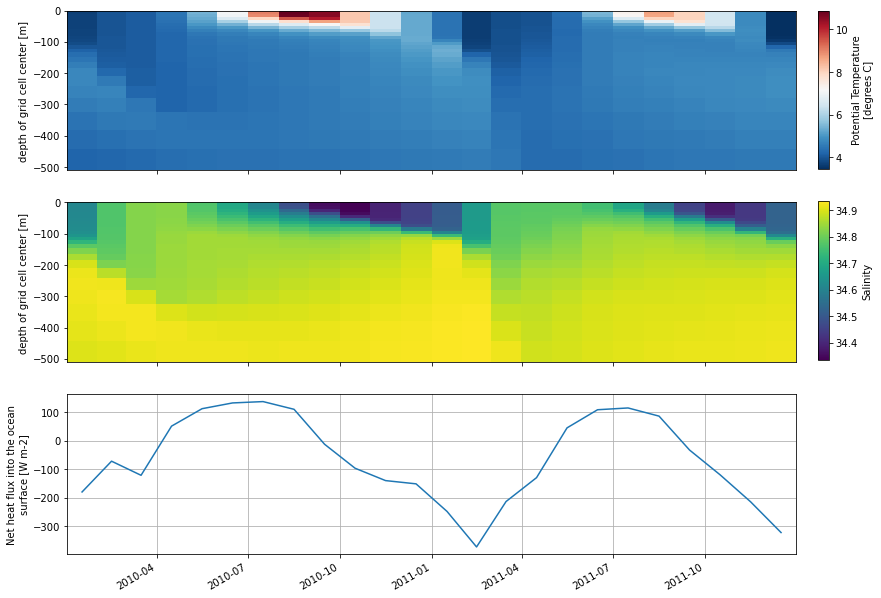

In [125]:
fig, axs = plt.subplots(3,1, figsize=[15,10],sharex=True)
axs = axs.ravel()

c1 = temp_salt_ds.sel(latitude=59.25, longitude=-54.75, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).THETA.plot(x="time",y="Z",ax=axs[0], cmap="RdBu_r",add_colorbar=False)
axs[0].set_title("")
axs[0].set_xlabel("")

c2 = temp_salt_ds.sel(latitude=59.25, longitude=-54.75, Z=slice(0,-500), time=slice("2010-01-01","2012-01-01")).SALT.plot(x="time",y="Z",ax=axs[1],add_colorbar=False)
axs[1].set_title("")
axs[1].set_xlabel("");

fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.82, 0.66, 0.01, 0.22])
cbar_ax2 = fig.add_axes([0.82, 0.395, 0.01, 0.22])
cbar1 = fig.colorbar(c1, cax=cbar_ax1)
cbar2 = fig.colorbar(c2, cax=cbar_ax2)

cbar1.set_label('Potential Temperature\n[degrees C]')
cbar2.set_label('Salinity')

heat_ds.sel(latitude=59.25, longitude=-54.75, time=slice("2010-01-01","2012-01-01")).oceQnet.plot(x="time",ax=axs[2])
axs[2].grid()
axs[2].set_title("")
axs[2].set_xlabel("");

### Plot seasons JJAS and DJFM temp and salinity

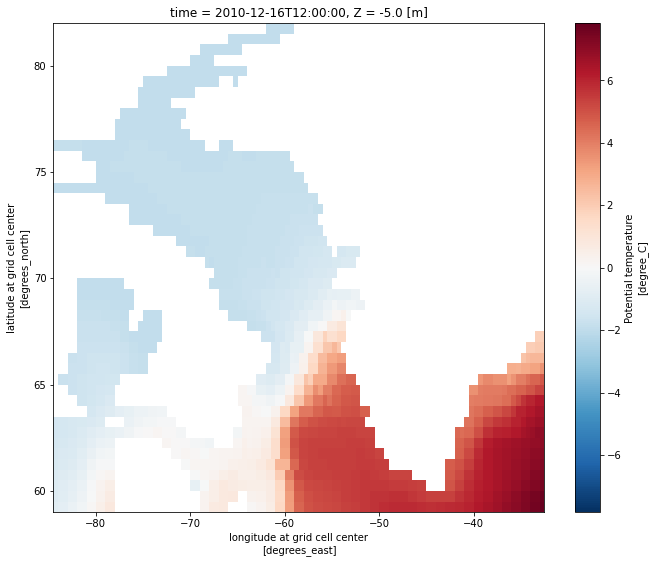

In [65]:
temp_salt_ds.sel(latitude=slice(59,82), longitude=slice(-84.25,-32.75), Z=-5, time="2010-12").THETA.plot(x="longitude",y="latitude",figsize=[11,9]);

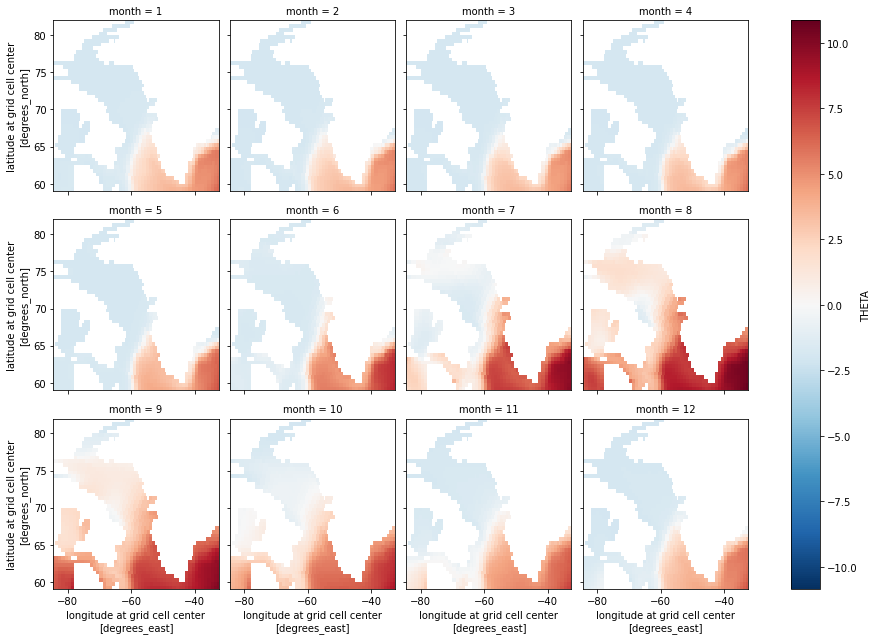

In [77]:
temp_salt_ds.sel(latitude=slice(59,82), longitude=slice(-84.25,-32.75), Z=-5).groupby("time.month").mean("time").THETA.plot(x="longitude",y="latitude",col="month",col_wrap=4)

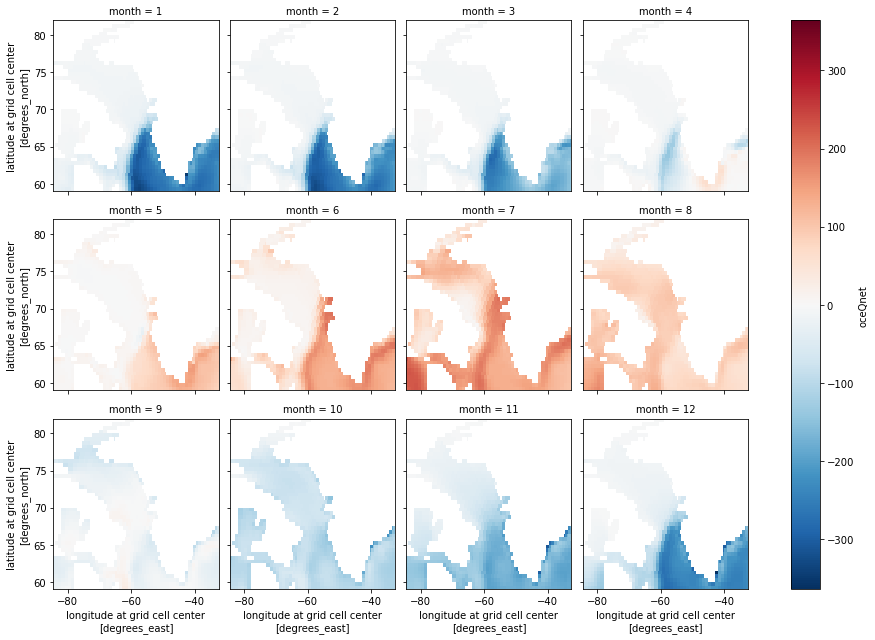

In [120]:
heat_ds.sel(latitude=slice(59,82), longitude=slice(-84.25,-32.75)).groupby("time.month").mean("time").oceQnet.plot(x="longitude",y="latitude",col="month",col_wrap=4)

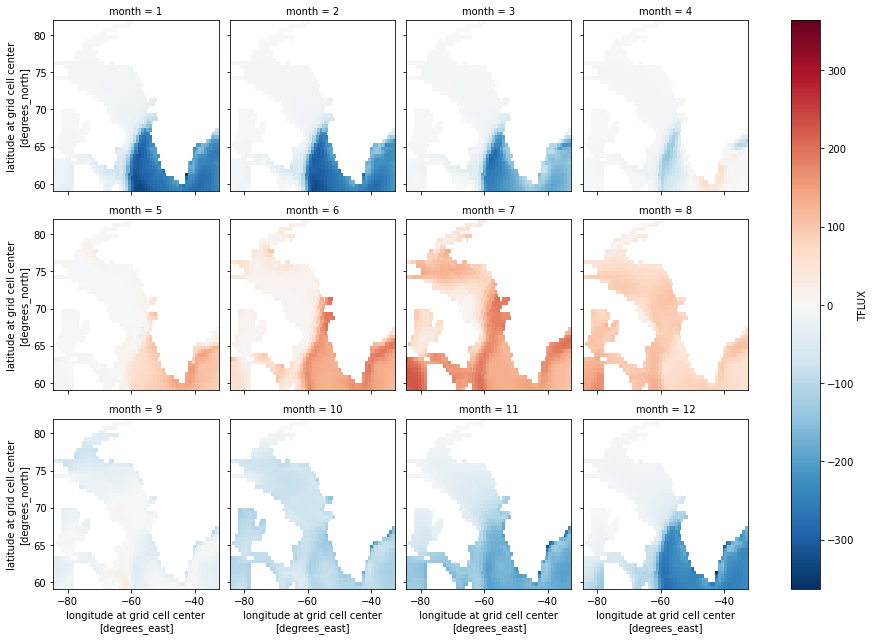

In [121]:
heat_ds.sel(latitude=slice(59,82), longitude=slice(-84.25,-32.75)).groupby("time.month").mean("time").TFLUX.plot(x="longitude",y="latitude",col="month",col_wrap=4)

In [39]:
# compute the time mean over the single year
# time_mean_SALT = xds.SALT.isel(Z=0).mean('time').compute()
time_mean_heat = xds.EXFqnet.mean('time').compute()

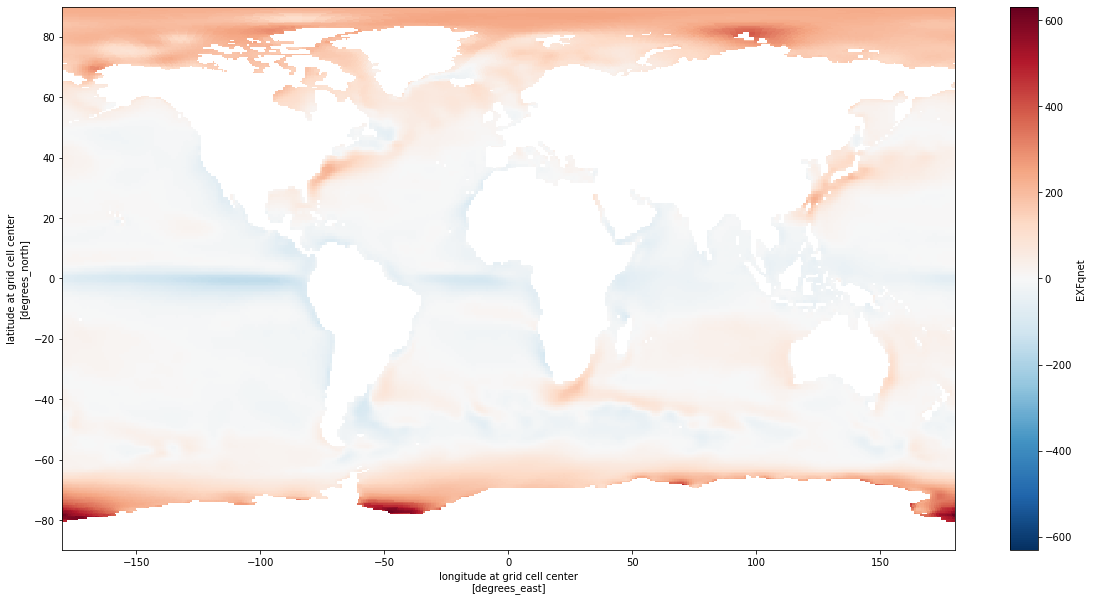

In [40]:
# time_mean_SALT.plot(figsize=[20,10])
time_mean_heat.plot(figsize=[20,10])

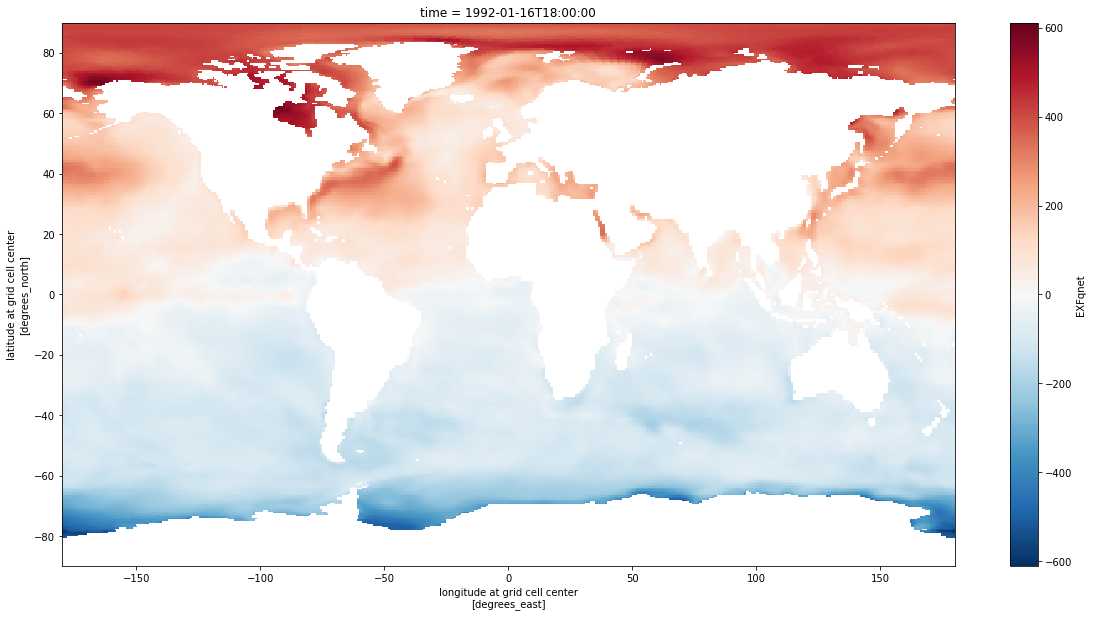

In [41]:
# Plot the anomaly of the first record relative to the time mean
# (xds.SALT.isel(Z=0,time=0) - time_mean_SALT).plot(figsize=[20,10])
(xds.EXFqnet.isel(time=0) - time_mean_heat).plot(figsize=[20,10])